In [15]:
%matplotlib inline
import numpy as np 
import pandas as pd 
from scipy import sparse
import mglearn
import matplotlib.pyplot as plt

In [16]:
X, y = mglearn.datasets.make_forge()
# scatter plot of forge dataset

X.shape: (26, 2)


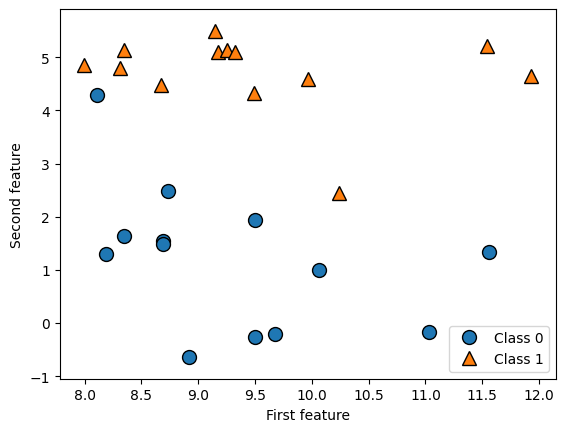

In [17]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature") 
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

Text(0, 0.5, 'Target')

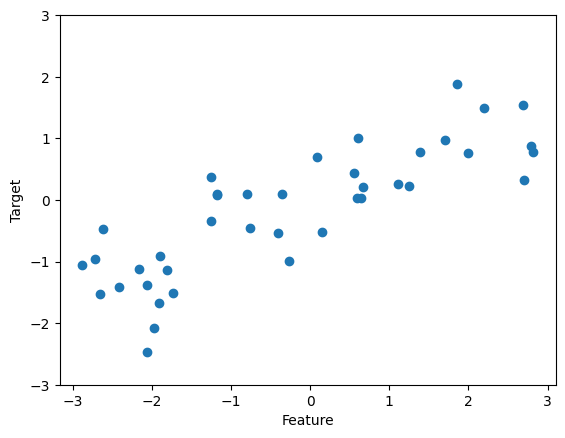

In [18]:
    X, y = mglearn.datasets.make_wave(n_samples=40)
    plt.plot(X, y, 'o')
    plt.ylim(-3, 3)
    plt.xlabel("Feature")
    plt.ylabel("Target")

In [19]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("Cancer keys: {}".format(cancer.keys()))

Cancer keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [20]:
cancer.target.shape

(569,)

In [21]:
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [24]:
clf.fit(X_train,y_train)


,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [25]:
print("Test set Prediction: {}".format(clf.predict(X_test)))

Test set Prediction: [1 0 0 1 0 0 0]


In [26]:
print("Test Set Accuracy : {:.2f}".format(clf.score(X_test,y_test)))

Test Set Accuracy : 0.86


In [27]:
print("Train Set Accuracy : {:.2f}".format(clf.score(X_train,y_train)))

Train Set Accuracy : 0.95


# Ridge Regression

In [28]:
X,y = mglearn.datasets.load_extended_boston()

In [29]:
from sklearn.linear_model import Ridge

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8)

In [31]:
ridge = Ridge()

In [32]:
ridge.fit(X_train,y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [33]:
print("Train Set Score: {:.2f}".format(ridge.score(X_train,y_train)))

Train Set Score: 0.86


In [34]:
print("Test Set Score: {:.2f}".format(ridge.score(X_test,y_test)))

Test Set Score: 0.85


In [35]:
ridge10 = Ridge(alpha=10).fit(X_train,y_train)

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lr = LinearRegression().fit(X_train,y_train)

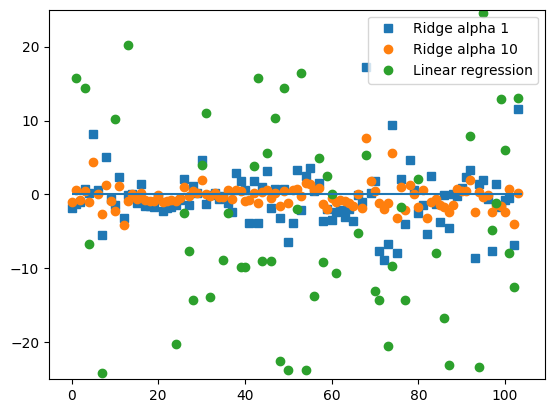

In [38]:
plt.plot(ridge.coef_, 's',label = "Ridge alpha 1")
plt.plot(ridge10.coef_, 'o', label = 'Ridge alpha 10')
plt.plot(lr.coef_, 'o', label = 'Linear regression')
plt.ylim(-25,25)
plt.hlines(0,0,len(ridge.coef_))

plt.legend()

# Lasso Regression

In [39]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.001,tol=0.003,max_iter=10000,random_state=55)

In [40]:
lasso.fit(X_test,y_test)

,alpha,0.001
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,10000
,tol,0.003
,warm_start,False
,positive,False
,random_state,55
,selection,'cyclic'


In [41]:
print('Train Score: {:.2f}'.format(lasso.score(X_train,y_train)))

Train Score: 0.70


In [42]:
print('Test Score: {:.2f}'.format(lasso.score(X_test,y_test)))

Test Score: 0.97


In [43]:
print("Features used: {}".format(np.sum(lasso.coef_ != 0)))

Features used: 55


# Classification

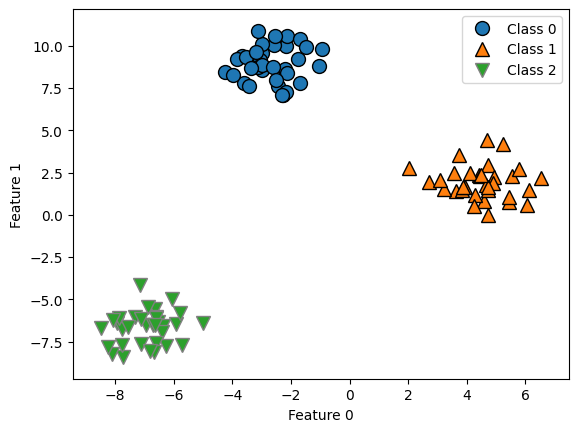

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [45]:
linear_svm = LinearSVC()

In [46]:
linear_svm.fit(X,y)

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


# Random Forest
here we use esembler which combine multiple models to create more powerful model

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [48]:
X,y = make_moons(n_samples=100,noise=0.25,random_state=3)
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=45)

In [49]:
forest = RandomForestClassifier(n_estimators=5,random_state=2)
forest.fit(X_train,y_train)

,n_estimators,5
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [50]:
print("Score {:.2f}".format(forest.score(X_test,y_test)))

Score 0.84


In [51]:
# breast cancer dataset 

X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)

In [52]:
forest = RandomForestClassifier(n_estimators=100,random_state=50)
forest.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [54]:
print("The score of train: {:.2f}".format(forest.score(X_train,y_train)))
print("The score of test: {:.2f}".format(forest.score(X_test,y_test)))


The score of train: 1.00
The score of test: 0.97
